**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 3

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#reading all features except price
train_x_a = pd.read_csv("training.csv").drop("price", axis = 1)
#reading only price
train_y = pd.read_csv("training.csv", usecols = ["price"])
#reading all features except price
test_x = pd.read_csv("test.csv").drop("price", axis = 1)
#reading only price
test_y = pd.read_csv("test.csv", usecols = ["price"])

In [3]:
#here i get the non_columns by using isnull and any and store them.
nan_columns = [i for i in train_x_a.columns if train_x_a[i].isnull().any()]
#i look at train_y and store the na ones' indexes
train_y_null_indexes = train_y[train_y['price'].isnull()].index.tolist()
#dropping na values from train_y
train_y = train_y.dropna()
#by using the code i stored y null indexes, i drop the very same ones from train_x_a
train_x_a = train_x_a.drop(index = train_y_null_indexes)

#In this part i get the median values of every feature, and store them because in future too.
median_wheelbase_a = train_x_a['wheelbase'].median()
median_carlength_a = train_x_a['carlength'].median()
median_carwidth_a = train_x_a['carwidth'].median()
median_carheight_a = train_x_a['carheight'].median()
median_curbweight_a = train_x_a['curbweight'].median()
median_enginesize_a = train_x_a['enginesize'].median()
median_boreratio_a = train_x_a['boreratio'].median()
median_stroke_a = train_x_a['stroke'].median()
median_compressionratio_a = train_x_a['compressionratio'].median()
median_horsepower_a = train_x_a['horsepower'].median()
median_carwidth_a = train_x_a['carwidth'].median()
median_peakrpm_a = train_x_a['peakrpm'].median()
median_citympg_a = train_x_a['citympg'].median()
median_highwaympg_a = train_x_a['highwaympg'].median()
median_price_a = train_y['price'].median()

train_x_b = train_x_a.fillna({
    'wheelbase': median_wheelbase_a,
    'carlength': median_carlength_a,
    'carheight': median_carheight_a,
    'carwidth': median_carwidth_a,
    'curbweight': median_curbweight_a,
    'enginesize': median_enginesize_a,
    'boreratio': median_boreratio_a,
    'stroke': median_stroke_a,
    'compressionratio': median_compressionratio_a,
    'horsepower': median_horsepower_a,
    'carwidth': median_carwidth_a,
    'peakrpm': median_peakrpm_a,
    'citympg': median_citympg_a,
    'highwaympg': median_highwaympg_a})

#i gel the columns of train_x_b
col_x_b = train_x_b.columns
#getting the numerical columns.
num_x_b = train_x_b._get_numeric_data().columns

#by doing col_x_b - num_x_b = i get categorical columns, just like (1 - what you have = what you want/probability.)
categorical_columns =  [i for i in set(col_x_b) - set(num_x_b)]

#get the data from b to d
train_x_d = train_x_b.copy()
#get one hot encoding with dummies with a for loop
for column in categorical_columns:
    train_x_d = pd.get_dummies(train_x_d, columns=[column], prefix = [column])

#i also store the x_d_column for the next part.    
train_x_d_column = []
for column in train_x_d:
    train_x_d_column.append(column)


#first i fitted and after, i transform it because we will use this on one of the next part.
scaler = StandardScaler()
train_x_e = scaler.fit(train_x_d)
train_x_e = scaler.transform(train_x_d)
#here since my output is a numpy i converted it to a dataframe again
train_x_e = pd.DataFrame(train_x_e)
#giving the names of the columns back.
train_x_e.columns = train_x_d_column

test_x = pd.read_csv("test.csv").drop("price", axis = 1)
test_y = pd.read_csv("test.csv", usecols = ["price"])

#getting the null indexes in the test_y
test_y_null_indexes = test_y[test_y['price'].isnull()].index.tolist()
#dropping them
test_y = test_y.dropna()
#dropping the same indexes from the test_x 
test_x = test_x.drop(test_y_null_indexes)
###index = test_y_null_indexes

#i used the same values from the the train medians and filled the NaN value in test_x
test_x = test_x.fillna({
    'wheelbase': median_wheelbase_a,
    'carlength': median_carlength_a,
    'carheight': median_carheight_a,
    'carwidth': median_carwidth_a,
    'curbweight': median_curbweight_a,
    'enginesize': median_enginesize_a,
    'boreratio': median_boreratio_a,
    'stroke': median_stroke_a,
    'compressionratio': median_compressionratio_a,
    'horsepower': median_horsepower_a,
    'carwidth': median_carwidth_a,
    'peakrpm': median_peakrpm_a,
    'citympg': median_citympg_a,
    'highwaympg': median_highwaympg_a})

#get the columns of text_x
col_test_x = test_x.columns
#get the numerical col data of test_x
num_test_x = test_x._get_numeric_data().columns

#get the categorical_columns in test
categorical_columns_test  =  [i for i in set(col_test_x) - set(num_test_x)]


#onehot with dummies for categorical_columns_test
for column in categorical_columns_test:
    test_x = pd.get_dummies(test_x, columns= [column], prefix = [column])

    
#getting the test_x columns. to use it after scale to give the names back to the features. 
test_x_column = []
for i in test_x:
    test_x_column.append(i)


#in this part we are only going to do transform we don't do scale 
#we want to keep the fit as it is.
temp = scaler.transform(test_x)
test_x = pd.DataFrame(temp)
test_x.columns = test_x_column

#Now, train_x_e, train_y, test_x, and test_y without NaNValues. Onehot encodded and Standartscaled. 

## KNN REGGRESSOR TO PREDICT CAR PRICES 

### a) Training Vs Validation Plot:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [20]:
#creating split.
X_train, X_val, y_train, y_val = train_test_split(train_x_e, train_y, test_size=0.2, random_state = 0)
#renaming them as in the template.
train_split_x = X_train
train_split_y = y_train
val_split_x = X_val
val_split_y = y_val

#creating the error arrays
knn_training_errors = []
knn_validation_errors = []
#the for loop
for i in range(1,31):
    neighbor = KNeighborsRegressor(n_neighbors = i)
    neighbor.fit(train_split_x, train_split_y)
    train_neighbor_prediction = neighbor.predict(train_split_x)
    val_neighbor_prediction = neighbor.predict(val_split_x)
    #appending the arrays
    knn_training_errors.append(mean_squared_error(train_split_y, train_neighbor_prediction))
    knn_validation_errors.append(mean_squared_error(val_split_y, val_neighbor_prediction))

Text(0, 0.5, 'Error')

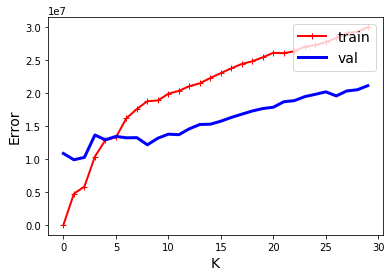

In [21]:
# training vs validation plot
plt.plot((knn_training_errors), "r-+", linewidth=2, label="train")
plt.plot((knn_validation_errors), "b-", linewidth=3, label="val")
plt.legend(loc="upper right", fontsize=14)   
plt.xlabel("K", fontsize=14) 
plt.ylabel("Error", fontsize=14)     

In [22]:
#In here i am getting the lowest value from the errors and their index because their index is same as their kneighbors parameter.
training_index_min = min(range(len(knn_training_errors)), key=knn_training_errors.__getitem__)
validation_index_min = min(range(len(knn_validation_errors)), key=knn_validation_errors.__getitem__)


#Getting the index from the validation error as the best one and passing it on the other one.
print("Min Error for training is:", min(knn_training_errors), ",found at(index)", training_index_min)
print("Min Error for validation is:", min(knn_validation_errors), ",index found at(index)", validation_index_min)

Min Error for training is: 8891.129032258064 ,found at(index) 0
Min Error for validation is: 9875419.602706097 ,index found at(index) 1


### b) Test your model:

In [40]:
#passing the neighbors as one since we found it above.
best_knn = KNeighborsRegressor(n_neighbors = 1)
best_knn.fit(train_x_e, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [41]:
#predicting on test set.
knn_preds = best_knn.predict(test_x)

In [42]:
#getting the mse
knn_mse = mean_squared_error(test_y, knn_preds)
print("MSE is: ", knn_mse)

MSE is:  11752743.15625


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

### c) Grid Search to find best model:

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

decision_tree_grid = DecisionTreeRegressor()
param_grid = {
            'max_depth': [None, 1, 5, 10],
            'min_samples_split': [0.01, 0.05, 0.1, 0.3],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes': [10, 50, 100, 250],
            'random_state': [0]
                }

#we put the parameters as in the assignment

decisiontree_search = GridSearchCV(decision_tree_grid, param_grid, cv=5, scoring='neg_mean_squared_error')
decisiontree_search.fit(train_x_e, train_y)
#this part we get the best parameter.
tree_best_parameters = (decisiontree_search.best_params_)
print("Decision tree best parameters: ", tree_best_parameters)


Decision tree best parameters:  {'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_split': 0.1, 'random_state': 0}


In [44]:
#creating the model with the best parameters and getting the MSE
best_tree_regressor = DecisionTreeRegressor(max_depth = None, max_features = 'auto', max_leaf_nodes = 50
                                           , min_samples_split = 0.1, random_state=0)

#fitting the training
best_tree_regressor.fit(train_x_e, train_y)
#predicting using training
tree_train_predict = best_tree_regressor.predict(train_x_e)
#getting error
tree_train_mse = abs(mean_squared_error(train_y,tree_train_predict))
print("Best model Train MSE", tree_train_mse)

Best model Train MSE 3376536.3504560455


### d) Test your model:

In [45]:
#passing the best parameters to the model
best_tree = DecisionTreeRegressor(max_depth = None, max_features = 'auto', max_leaf_nodes = 50
                                           , min_samples_split = 0.1, random_state=0)
#fitting the model
best_tree.fit(train_x_e, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=50, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [46]:
#passing the test.
tree_test_predict = best_tree.predict(test_x)

In [47]:
#getting the error
tree_mse = abs(mean_squared_error(test_y,tree_test_predict))
print("Test set MSE: ", tree_mse)

Test set MSE:  9779323.383824795


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

### e) Grid Search to find best model:

In [48]:
#importing models.
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#creating baggingregressor
bagging_regressor = BaggingRegressor()
#creating my parameter, that i will use in the next line.
bag_parameter = { 'base_estimator': [LinearRegression(), KNeighborsRegressor(),  DecisionTreeRegressor(random_state=0)],
                 'n_estimators': [25,50,100,250], 'bootstrap_features': [False,True], 'random_state': [0]}
#doing a grid search with the parameters.
bag_grid_search = GridSearchCV(bagging_regressor, bag_parameter, cv=5, scoring='neg_mean_squared_error')

#fitting train
bag_grid_search.fit(train_x_e,train_y)
best_bag = bag_grid_search.best_params_
print(best_bag)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best'), 'bootstrap_features': True, 'n_estimators': 25, 'random_state': 0}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


### f) Test your model:

In [49]:
new_bag_model = BaggingRegressor(base_estimator= DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best'), bootstrap_features= True, n_estimators= 25, random_state= 0)
new_bag_model.fit(train_x_e, train_y)
new_bag_prediction = new_bag_model.predict(test_x)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [50]:
bag_mse = abs(mean_squared_error(test_y, new_bag_prediction))
print("Bag MSE:", bag_mse)

Bag MSE: 4983896.0198072065


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

### g) Grid Search to find best model:

In [53]:
from sklearn.ensemble import RandomForestRegressor

random_forest_grid = {'n_estimators': [25, 50, 100, 250],
    'max_depth' : [None, 1, 5, 10],
    'random_state' :[0]}

rfc=RandomForestRegressor(random_state= 0)

rfc_grid = GridSearchCV(estimator=rfc, param_grid= random_forest_grid, cv= 5, scoring ='neg_mean_squared_error')
rfc_grid.fit(train_x_e,train_y)
print(rfc_grid.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

{'max_depth': 10, 'n_estimators': 25, 'random_state': 0}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [54]:

#passing the best parameters
best_rfc = RandomForestRegressor(max_depth = 10, n_estimators = 250, random_state = 0)
#fitting train
best_rfc.fit(train_x_e, train_y)
#predicting
train_best_rfc_predict = best_rfc.predict(train_x_e)
#getting error for best model on train set
print("Train MSE Error: ", abs(mean_squared_error(train_y, train_best_rfc_predict)))


Train MSE Error:  819984.2239897853


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### h) Test your model:

In [55]:
#passing the best parameters
best_random_forest = RandomForestRegressor(max_depth = 10, n_estimators = 250, random_state = 0)
#training my model.-
best_random_forest.fit(train_x_e, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [56]:
#predicting on test set.
random_forest_preds = best_random_forest.predict(test_x)

In [57]:
#getting the error
random_forest_mse = abs(mean_squared_error(test_y, random_forest_preds))
print(random_forest_mse)

4885366.97091008


### i) Feature Importances:

In [77]:
import numpy as np

#getting the importances.
importances = best_random_forest.feature_importances_
#looking at the estimators with feature importances of tree
std = np.std([tree.feature_importances_ for tree in best_random_forest.estimators_],
             axis=0)
#getting the indices of them
indices = np.argsort(importances)[::-1]

#stacking three of them
top_3_rf_features_indices = []
print("Feature ranking:")
for f in range(3):
    #printing the features and their values.
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    top_3_rf_features_indices.append(indices[f])

    
#by looking at the indices, i pick them from the dataset.
print(top_3_rf_features_indices)
#here are the top 3 ones.
top_3_features = ['enginesize', 'curbweight', 'highwaympg']
print(top_3_features)

Feature ranking:
1. feature 5 (0.647932)
2. feature 4 (0.101608)
3. feature 12 (0.041827)
[5, 4, 12]
['enginesize', 'curbweight', 'highwaympg']
